In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import calendar

In [2]:
crime_data_to_load = Path("../Resources/crime_grouped_data.csv")
crime_data = pd.read_csv(crime_data_to_load)

## Number of Crimes by Month

In [3]:
crime_data["Date Reported"] = pd.to_datetime(crime_data["Date Reported"])
crime_data["Date Occurred"] = pd.to_datetime(crime_data["Date Occurred"])

crime_data["Month Occurred"] = crime_data["Date Occurred"].dt.month

In [4]:
crime_by_month = crime_data.groupby("Month Occurred").size()

month_df = pd.DataFrame({'Count': crime_by_month, 'Percentage (%)': round(crime_by_month / crime_by_month.sum() * 100,2)})
month_df


,Count,Percentage (%)
Month Occurred,,
1,72845,9.45
2,68506,8.89
3,70990,9.21
4,70010,9.08
5,72930,9.46
6,72247,9.38
7,72662,9.43
8,55211,7.16
9,53156,6.90


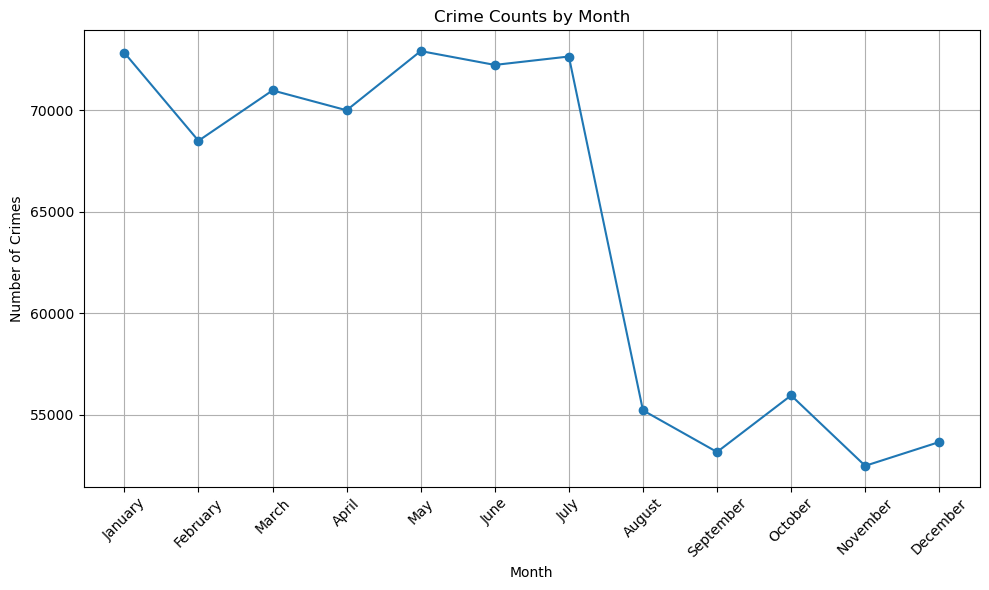

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(crime_by_month.index, crime_by_month.values, marker='o')

plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Month")
plt.grid(True)

month_names = [calendar.month_name[i] for i in crime_by_month.index]
plt.xticks(crime_by_month.index, month_names, rotation=45)

plt.tight_layout() 
plt.show()

plt.savefig(".../Resources/Crime_Counts_month.png")

## Number of Crimes by Hour

In [6]:
crime_byhour = crime_data.groupby("Crime Code Category")["Hour Occurred"].value_counts()

crime_byhour_df = crime_byhour.unstack(level=0)
crime_byhour_df

Crime Code Category,Assault/Violent Crimes,Burglary/ Theft,Court Order Violations,Crimes Against Minors,Driving Violations,Firearms/Weapons,Miscellaneous,Public Order,Sexually Motivated Crimes,Theft of Identity,Vandalism,Vehicle Crimes,White Collar Crimes
Hour Occurred,,,,,,,,,,,,,
00:00 to 01:00,9644,12228,596,553,117,801,327,605,1721,5898,3754,4319,393
01:00 to 02:00,6351,7527,333,110,102,580,163,445,539,1114,2356,2280,109
02:00 to 03:00,4923,7186,240,75,92,478,129,368,466,620,2137,1928,77
03:00 to 04:00,3331,6880,210,65,58,334,122,317,324,478,1777,1678,70
04:00 to 05:00,2759,6404,221,63,54,265,115,279,244,482,1486,1764,72
05:00 to 06:00,2611,6045,254,140,21,243,107,295,355,1243,1704,2235,98
06:00 to 07:00,3338,6096,382,181,12,264,122,444,407,2848,1772,2514,165
07:00 to 08:00,5065,8766,653,400,23,400,185,631,684,3201,2300,2968,360
08:00 to 09:00,6173,8906,737,285,23,512,214,701,575,2753,2564,2684,388


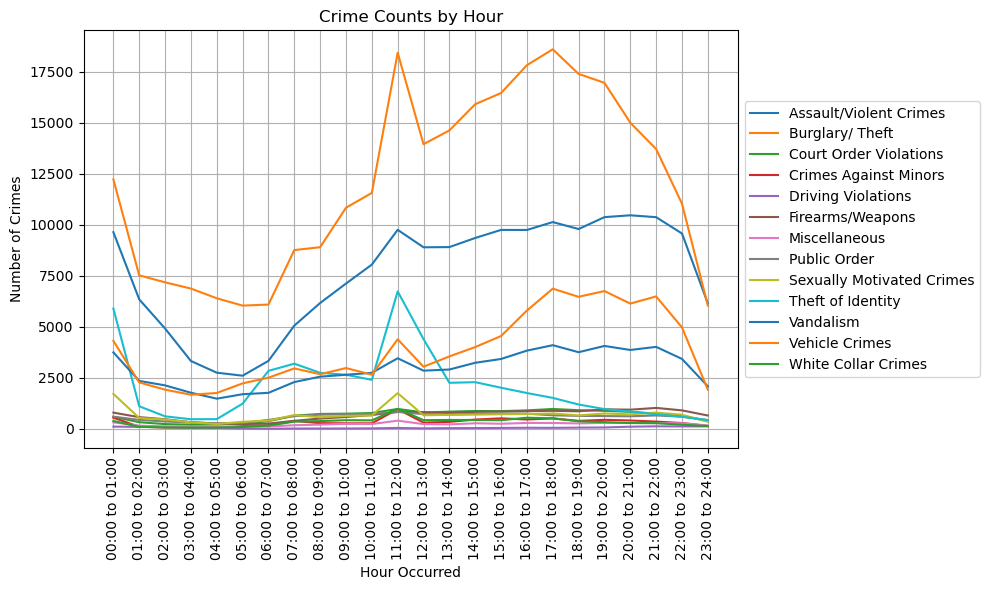

In [24]:

plt.figure(figsize=(10, 6))

for column in crime_byhour_df.columns:
    plt.plot(crime_byhour_df.index, crime_byhour_df[column], label=column)

plt.xlabel("Hour Occurred")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Hour")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.xticks(rotation=90)
plt.tight_layout()  


plt.savefig(".../Resources/crime_counts_hourly.png")

## Number of Crimes by Crime Code Category

In [8]:
crime_category_count = crime_data["Crime Code Category"].value_counts().sort_values(ascending=False)

crime_category_df = pd.DataFrame({'Count': crime_category_count, 'Percentage (%)': round(crime_category_count / crime_category_count.sum() * 100,2)})
crime_category_df

,Count,Percentage (%)
Burglary/ Theft,288426,37.43
Assault/Violent Crimes,182705,23.71
Vehicle Crimes,93039,12.07
Vandalism,70367,9.13
Theft of Identity,49493,6.42
Sexually Motivated Crimes,16662,2.16
Firearms/Weapons,16434,2.13
Court Order Violations,15891,2.06
Public Order,14339,1.86
Crimes Against Minors,8102,1.05


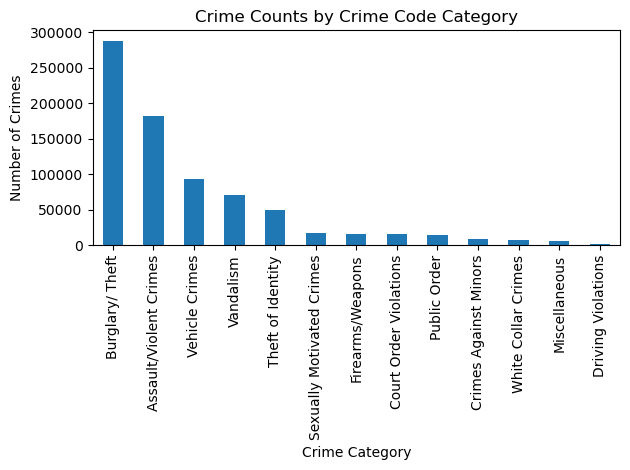

<Figure size 640x480 with 0 Axes>

In [27]:
crime_category_chart = crime_category_count.plot(kind='bar')

plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Crime Code Category")

plt.tight_layout()
plt.show()


plt.savefig(".../Resources/crime_counts_by_category.png")

## Nuber of Crimes by Premise Category

In [10]:
premise_count = crime_data["Premise Category"].value_counts().sort_values(ascending=False)

premise_df = pd.DataFrame({'Count': premise_count, 'Percentage (%)': round(premise_count / premise_count.sum() * 100,2)})
premise_df


,Count,Percentage (%)
Outdoor Locations,349050,45.32
Residential,239819,31.14
Commercial Locations,121367,15.76
Transportation,34137,4.43
Public Facilities,17397,2.26
Miscellaneous,8405,1.09


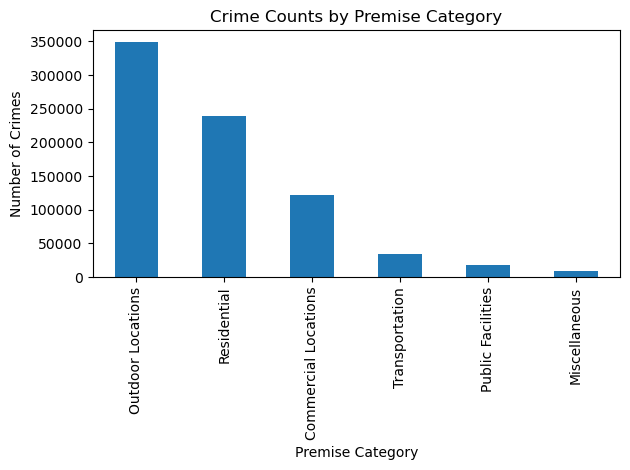

<Figure size 640x480 with 0 Axes>

In [30]:
premise_chart = premise_count.plot(kind='bar')

plt.xlabel("Premise Category")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Premise Category")

plt.tight_layout()
plt.show()

plt.savefig(".../Resources/crime_counts_premise_category.png")

## Victims by Age Range

In [12]:
victim_age_range = crime_data["Victim Age Range"].value_counts()

victim_age_df = pd.DataFrame({'Count': victim_age_range, 'Percentage (%)': round(victim_age_range / victim_age_range.sum() * 100,2)})
victim_age_df

,Count,Percentage (%)
26-45,285108,37.00
<18,213662,27.73
46-65,148704,19.30
18-25,84104,10.91
>65,39050,5.07


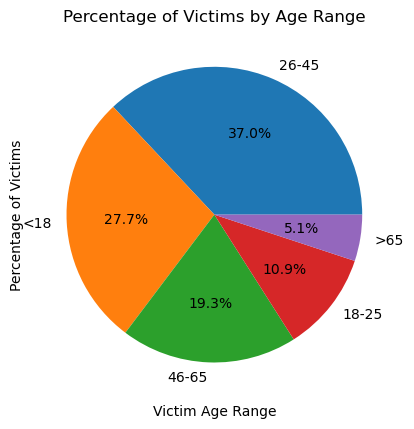

<Figure size 640x480 with 0 Axes>

In [31]:
age_chart = victim_age_range.plot(kind='pie', autopct="%1.1f%%")

plt.xlabel("Victim Age Range")
plt.ylabel("Percentage of Victims")
plt.title("Percentage of Victims by Age Range")

plt.show()

plt.savefig(".../Resources/perc_victimes_by_age.png")

## Victims by Ethnicity

In [14]:
victim_ethnicity = crime_data["Victim Ethnicity"].value_counts().sort_values(ascending=False)

victim_ethnicity_df = pd.DataFrame({'Count': victim_ethnicity, 'Percentage (%)': round(victim_ethnicity / victim_ethnicity.sum() * 100,2)})
victim_ethnicity_df

,Count,Percentage (%)
Hispanic/Latin/Mexican,236614,35.33
White,157928,23.58
Black,110441,16.49
Unknown,73229,10.93
Other,61044,9.11
Other Asian,16825,2.51
Korean,4093,0.61
Filipino,3177,0.47
Chinese,2908,0.43
Japanese,1076,0.16


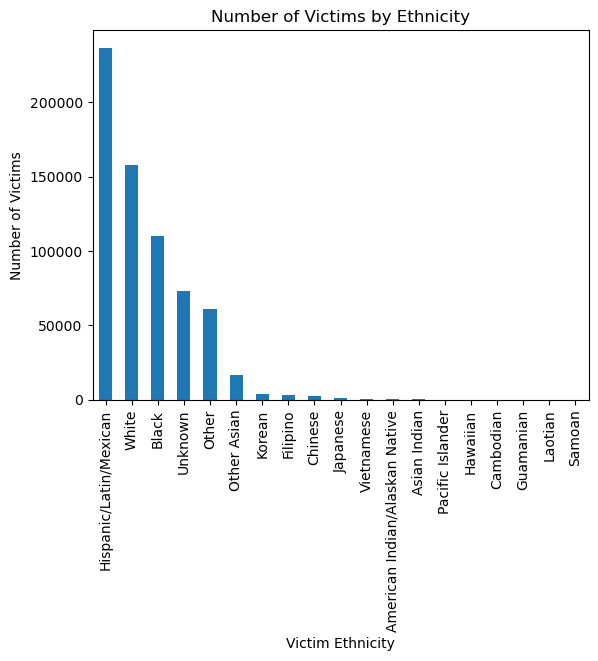

<Figure size 640x480 with 0 Axes>

In [32]:
ethnicity_chart = victim_ethnicity.plot(kind='bar')

plt.xlabel("Victim Ethnicity")
plt.ylabel("Number of Victims")
plt.title("Number of Victims by Ethnicity")

plt.show()
plt.savefig(".../Resources/victimes_by_ethnicity.png")

## Victims by Sex

In [16]:
victim_sex = crime_data["Victim Sex"].value_counts().sort_values(ascending=False)

victim_sex_df = pd.DataFrame({'Count': victim_sex, 'Percentage (%)': round(victim_sex / victim_sex.sum() * 100,2)})
victim_sex_df

,Count,Percentage (%)
Male,319133,47.65
Female,284553,42.48
Unknown,66119,9.87


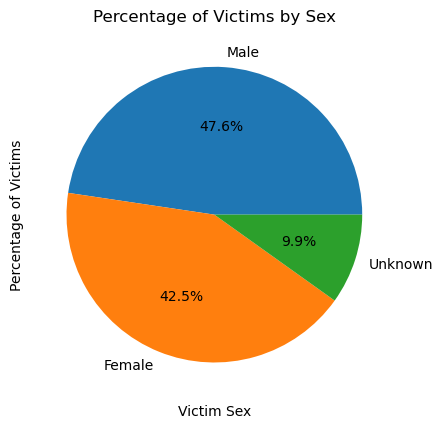

<Figure size 640x480 with 0 Axes>

In [33]:
sex_chart = victim_sex.plot(kind='pie', autopct="%1.1f%%")

plt.xlabel("Victim Sex")
plt.ylabel("Percentage of Victims")
plt.title("Percentage of Victims by Sex")

plt.show()
plt.savefig(".../Resources/perc_victims_by_sex")